# Лабораторная работа №6. Дискретное косинусное преобразрвание

## Упражнение 6.1

In [30]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import linregress
sys.path.append('../')
from thinkdsp import read_wave, decorate, Spectrogram, UncorrelatedGaussianNoise

В этой главе утверждается, что analyze1 требует времени пропорционально n^3, а analyze2 - пропорционально n^2. Убедимся в этом, запуская их с несколькими разными массивами и засекая время работы.

In [31]:
signal = UncorrelatedGaussianNoise()
noise = signal.make_wave(duration=1.0, framerate=40000)

def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi * 2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi * 2 * args)
    amps = np.dot(M, ys) / 2
    return amps

def plot(x, y):
    plt.plot(x, y)
    decorate(xscale='log', yscale='log')

    x = np.log(x)
    y = np.log(y)
    t = linregress(x, y)
    print("Slope:", t[0])

def perft(func, test_x):
    results = []
    for N in test_x:
        print(N)
        ts = (0.5 + np.arange(N)) / N
        freqs = (0.5 + np.arange(N)) / 2
        ys = noise.ys[:N]
        result = %timeit  -r1 -o func(ys, freqs, ts)
        results.append(result)
    return [result.best for result in results]

32
157 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
64
263 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
128
906 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
256
2.95 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
512
15 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
57.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
381 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4096
2.97 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8192
14.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Slope: 2.1344296080598677


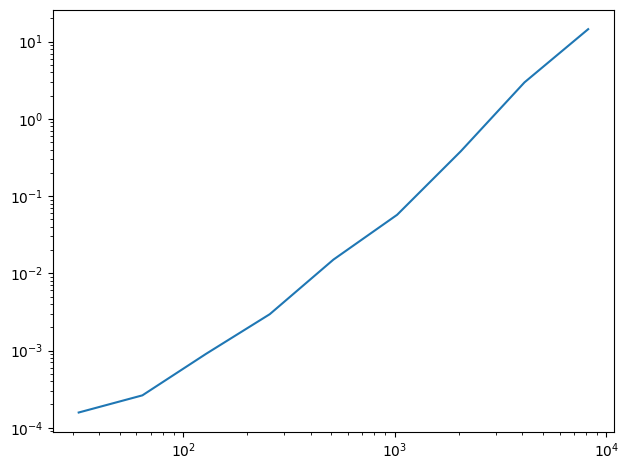

In [32]:
test_x = 2 ** np.arange(5, 14)
an1_time = perft(analyze1, test_x)
plot(test_x, an1_time)

32
21.7 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
64
64.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
128
4.39 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
256
2.23 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
512
8.32 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
35.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
133 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4096
807 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8192
3.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Slope: 2.0708781429503493


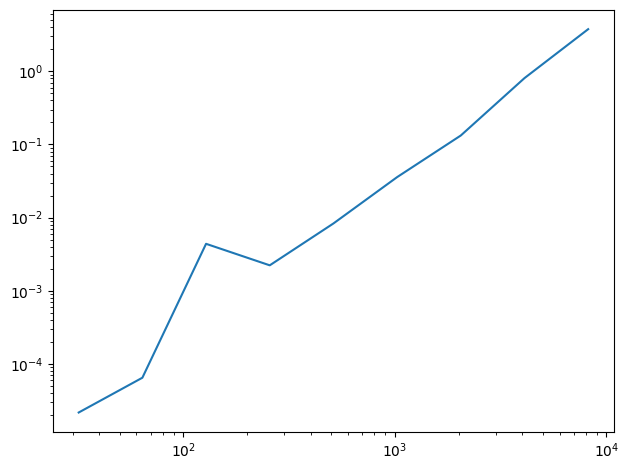

In [33]:
test_x = 2 ** np.arange(5, 14)
an2_time = perft(analyze2, test_x)
plot(test_x, an2_time)

Как и ожидалось, в результате получена почти прямая линия с наклоном, близким к 2.

Протестируем scipy.fftpack.dct:

32
4.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
64
4.74 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
128
4.83 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
256
6.74 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
512
6.38 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
1024
8.42 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
2048
13.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
4096
23.8 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
8192
45.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
Slope: 0.40352775887147146


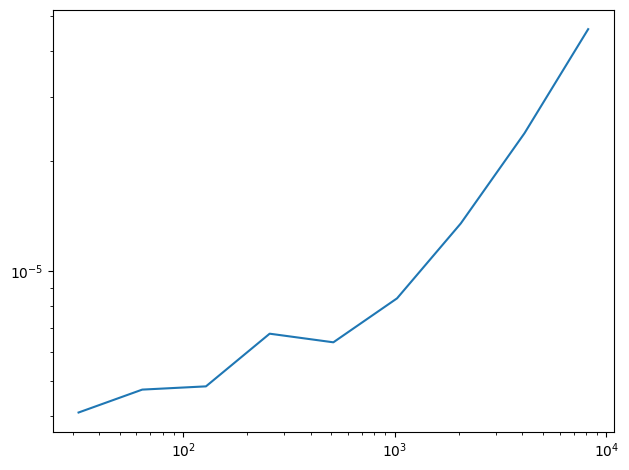

In [34]:
import scipy.fftpack

def scipy_dct(ys, freqs, ts):
    return scipy.fftpack.dct(ys, type=3)

scipy_time = perft(scipy_dct, test_x)
plot(test_x, scipy_time)

По графику видно, что функция работает быстрее, время её работы пропорционально N * log(N).

Протестируем dct_iv:

32
28.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
64
71.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
128
852 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
256
2.18 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
512
8.34 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
32 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
160 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4096
712 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8192
3.49 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Slope: 2.108133996842743


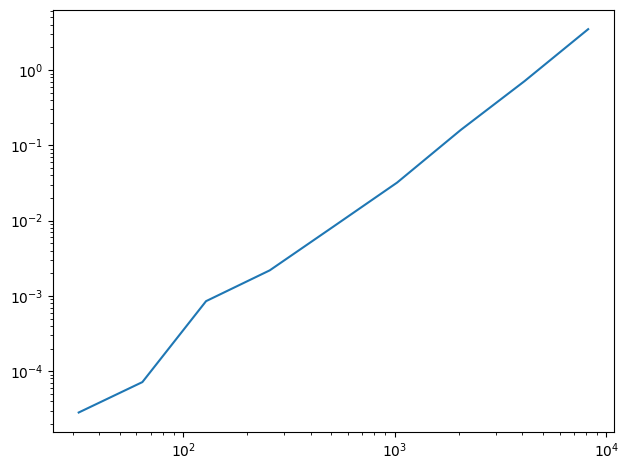

In [37]:
def dct_iv(ys, freqs, ts):
  N = len(ys)
  ts = (0.5 + np.arange(N))/N
  fs = (0.5 + np.arange(N))/2
  args = np.outer(ts,fs)
  M = np.cos(np.pi * 2 *args)
  amps = np.dot(M, ys) / 2
  return amps

dct_time = perft(dct_iv, test_x)
plot(test_x, dct_time)

Упражнение 6.2

Oдно из основных применений ДКП - это сжатие звука и изображений. В простейшей форме ДКП при сжатии работает следующим образом:

1. Разбивает длинный сигнал на сегменты.
2. Вычисляет ДКП каждого сегмента.
3. Определяет частотные компоненты с такой амплитудой, что их не слышно, и удаляет их, сохраняя только оставшиеся частоты и амплитуды.
4. При воспроизведении сигнала загружает частоты и амплитуды каждого сегмента и применяет обратное ДКП.

Реализуем версию этого алгоритма и применим его для записи музыки или речи. Посмотрим, сколько компонент можно удалить до того, как разница станет заметной.

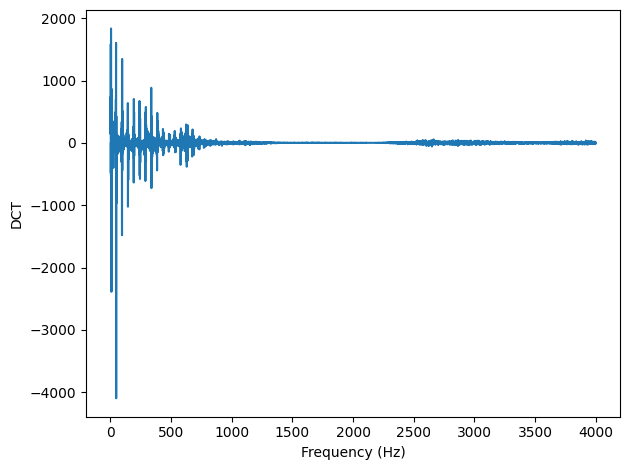

In [45]:
wave = read_wave('vocals.wav')
segment = wave.segment(start=1, duration=0.5)
segment.normalize()

seg_dct = segment.make_dct()
seg_dct.plot(high=4000)
decorate(xlabel='Frequency (Hz)', ylabel='DCT')

segment.make_audio()

Напишем функцию, которая убирает из ДКП частоты со значениями ниже заданного treshold:

9146	22050	41.47845804988662


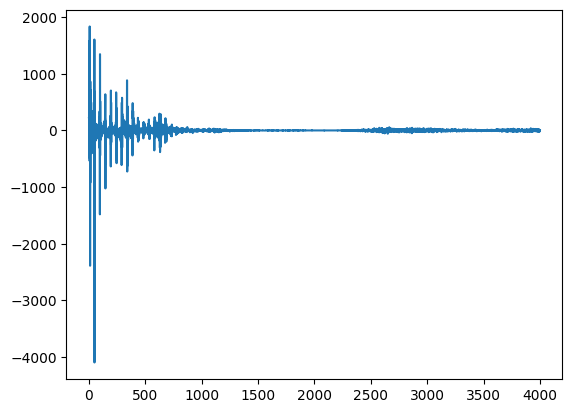

In [43]:
def compress(dct, thresh=1):
    count = 0
    for i, amp in enumerate(dct.amps):
        if np.abs(amp) < thresh:
            dct.hs[i] = 0
            count += 1

    n = len(dct.amps)
    print(count, n, 100 * count / n, sep='\t')

seg_dct = segment.make_dct()
compress(seg_dct, thresh=1)
seg_dct.plot(high=4000)

seg2 = seg_dct.make_wave()
seg2.make_audio()

На слух изменение звука не получилось уловить

Создадим функцию, которая позволит получить спектрограмму ДКП и сожмем с ее помощью все сегменты ДСП


In [57]:
def make_dct_spectrogram(wave, seg_length):
    window = np.hamming(seg_length)
    i, j = 0, seg_length
    step = seg_length // 2

    spec_map = {}

    while j < len(wave.ys):
        segment = wave.slice(i, j)
        segment.window(window)

        t = (segment.start + segment.end) / 2
        spec_map[t] = segment.make_dct()

        i += step
        j += step

    return Spectrogram(spec_map, seg_length)

spectr = make_dct_spectrogram(wave, seg_length=1024)
for t, dct in sorted(spectr.spec_map.items()):
    compress(dct, thresh=0.002)

193	1024	18.84765625
85	1024	8.30078125
115	1024	11.23046875
127	1024	12.40234375
108	1024	10.546875
119	1024	11.62109375
83	1024	8.10546875
107	1024	10.44921875
122	1024	11.9140625
101	1024	9.86328125
96	1024	9.375
72	1024	7.03125
102	1024	9.9609375
83	1024	8.10546875
97	1024	9.47265625
119	1024	11.62109375
101	1024	9.86328125
108	1024	10.546875
111	1024	10.83984375
128	1024	12.5
117	1024	11.42578125
114	1024	11.1328125
114	1024	11.1328125
108	1024	10.546875
118	1024	11.5234375
103	1024	10.05859375
107	1024	10.44921875
52	1024	5.078125
99	1024	9.66796875
91	1024	8.88671875
28	1024	2.734375
94	1024	9.1796875
93	1024	9.08203125
117	1024	11.42578125
128	1024	12.5
127	1024	12.40234375
119	1024	11.62109375
123	1024	12.01171875
100	1024	9.765625
122	1024	11.9140625
94	1024	9.1796875
110	1024	10.7421875
118	1024	11.5234375
93	1024	9.08203125
110	1024	10.7421875
74	1024	7.2265625
103	1024	10.05859375
107	1024	10.44921875
116	1024	11.328125
113	1024	11.03515625
110	1024	10.7421875
109	1024	10.

In [58]:
wave2 = spectr.make_wave()
wave2.make_audio()

Увеличим сжатие и прослушаем звук еще раз

In [61]:
spectr = make_dct_spectrogram(wave, seg_length=1024)
for t, dct in sorted(spectr.spec_map.items()):
    compress(dct, thresh=0.1)

wave3 = spectr.make_wave()
wave3.make_audio()

952	1024	92.96875
949	1024	92.67578125
945	1024	92.28515625
939	1024	91.69921875
945	1024	92.28515625
951	1024	92.87109375
930	1024	90.8203125
951	1024	92.87109375
935	1024	91.30859375
938	1024	91.6015625
923	1024	90.13671875
900	1024	87.890625
927	1024	90.52734375
905	1024	88.37890625
934	1024	91.2109375
935	1024	91.30859375
948	1024	92.578125
942	1024	91.9921875
952	1024	92.96875
951	1024	92.87109375
944	1024	92.1875
956	1024	93.359375
948	1024	92.578125
951	1024	92.87109375
957	1024	93.45703125
951	1024	92.87109375
953	1024	93.06640625
795	1024	77.63671875
933	1024	91.11328125
926	1024	90.4296875
828	1024	80.859375
826	1024	80.6640625
903	1024	88.18359375
955	1024	93.26171875
957	1024	93.45703125
949	1024	92.67578125
956	1024	93.359375
949	1024	92.67578125
945	1024	92.28515625
941	1024	91.89453125
945	1024	92.28515625
938	1024	91.6015625
942	1024	91.9921875
939	1024	91.69921875
947	1024	92.48046875
926	1024	90.4296875
949	1024	92.67578125
948	1024	92.578125
950	1024	92.7734375
956	1

После дополнительного сжатия на записи стали заметны шумы

## Упражнение 6.3

В качестве сегмента звука используем файл ***comin-as-you-are.wav*** из первой лабораторной работы.
Загрузим и послушаем сегмент:

In [65]:
wave = read_wave("../lab1/comin-as-you-are.wav")
segment = wave.segment(start=1, duration=1)
segment.make_audio()

Выведем Амплитуду, фазу и waveform сегмента 

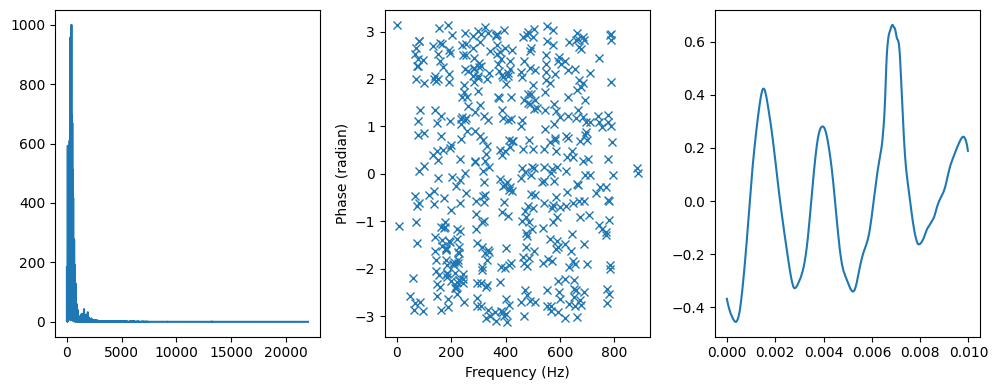

In [67]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    decorate(xlabel='Frequency (Hz)',
             ylabel='Phase (radian)')

def plot_three(spectrum, thresh=1):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()

spectrum = segment.make_spectrum()
plot_three(spectrum, thresh=50)

Далее приравняем все фазы к нулю и прослушаем запись

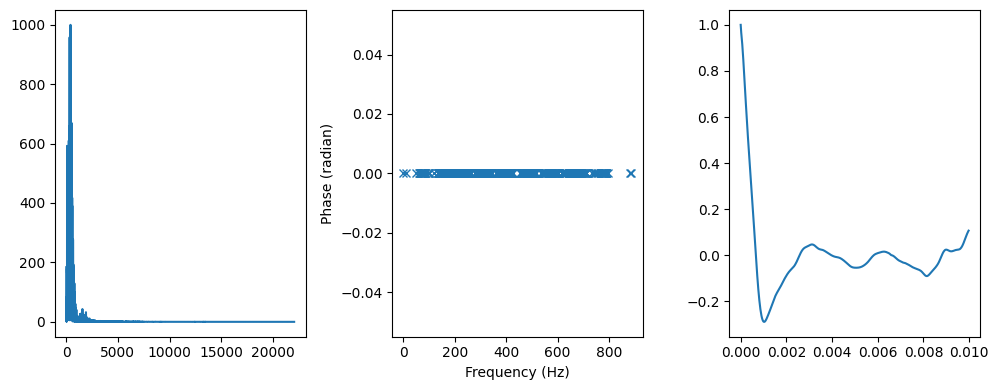

In [68]:
def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

spectrum2 = zero_angle(spectrum)
plot_three(spectrum2, thresh=50)
spectrum2.make_wave().make_audio()

Слышна только амплитуда изначального сигнала
Напишем функцию для поворота углов на заданное число радиан и проверим её работу:

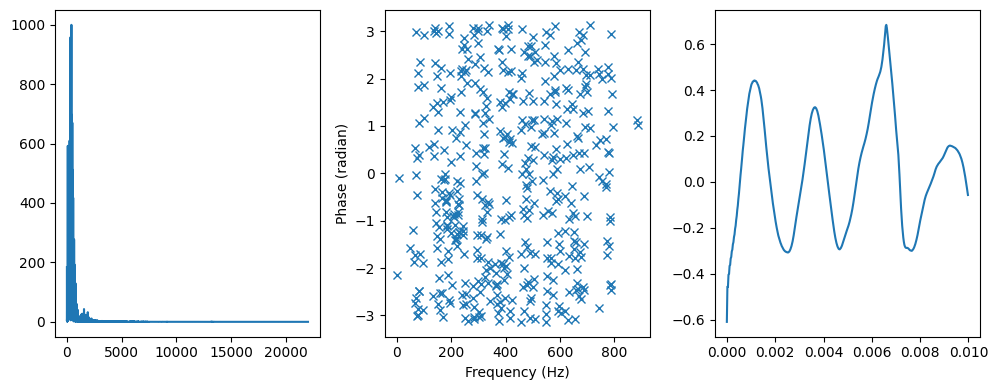

In [72]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3, thresh=50)
spectrum3.make_wave().make_audio()

При повороте фазы на 1 радиан на слух разница не заметна

Создадим функцию для рандомизации углов:

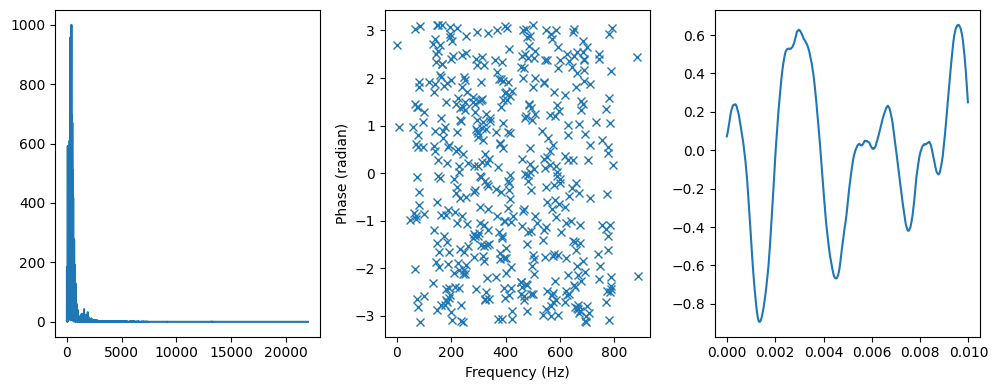

In [73]:
def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, np.pi * 2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

spectrum4 = random_angle(spectrum)
plot_three(spectrum4, thresh=50)
spectrum4.make_wave().make_audio()

Запись стала похожа на низкочастотный красный шум